In [361]:
import pandas as pd
import numpy as np
from scipy.signal import argrelextrema
import matplotlib.pyplot as plt

In [472]:
folder_name = '1647004551'
file_nr = '1'

In [473]:
df = pd.read_csv(f'rawdata/{folder_name}/pulseLN{file_nr}.csv', header=None, names=["value"])
f'rawdata/{folder_name}/pulseLN{file_nr}.csv'

'rawdata/1647004551/pulseLN1.csv'

In [474]:
original_count = len(df['value'])

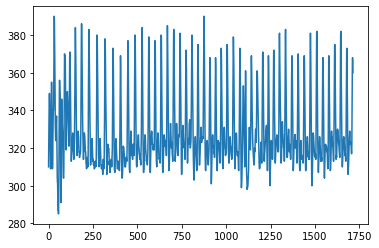

In [475]:
ax = plt.gca()
plt.plot(df.index, df['value'])

In [476]:
# remove small values
df = df.drop(df[df.value < 330].index)

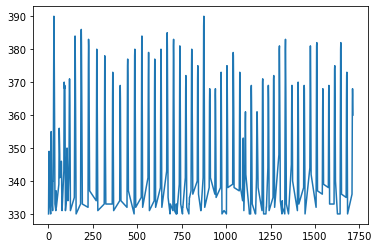

In [477]:
plt.plot(df.index, df['value'])

In [478]:
# number of points to be checked before and after
n = 5 
df['max'] = df.iloc[argrelextrema(df.value.values, np.greater_equal, order=n)[0]]['value']

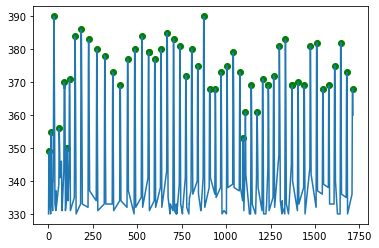

In [479]:
plt.scatter(df.index, df['max'], c='g')
plt.plot(df.index, df['value'])

In [480]:
df = df.dropna()

In [481]:
peaks_count = len(df['max'])
peaks_count

56

In [482]:
# miliseconds
HRV = experiment_time_ms / peaks_count
HRV

339.2857142857143